In [2]:
import matplotlib.pyplot as plt
import numpy as np
# from train import find_threshold_percentile, fbeta_score, EXP_ID
import PIL.Image as Image
import cv2
from scipy.optimize import minimize
from functools import lru_cache, partial
from typing import Callable, List, Tuple

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import os
import gc
import re
import ast
import sys
import copy
import json
import time
import math
import shutil
import string
import pickle
import random
import joblib
import itertools
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

import scipy as sp
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from tqdm.auto import tqdm

from sklearn.linear_model import Ridge
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_sample_weight

In [4]:
def func_percentile(y_true: np.ndarray, y_pred: np.ndarray, t: List[float]):
    score = fbeta_score(
        y_true,
        (y_pred > np.quantile(y_pred, np.clip(t[0], 0, 1))).astype(int),
        beta=0.5,
    )
    return -score

In [5]:
def find_threshold_percentile(y_true: np.ndarray, y_pred: np.ndarray):
    x0 = [0.5]
    threshold = minimize(
        partial(
            func_percentile,
            y_true,
            y_pred,
        ),
        x0,
        method="nelder-mead",
    ).x[0]
    return np.clip(threshold, 0, 1)

In [6]:
def fbeta_score(
    targets: np.ndarray, preds: np.ndarray, beta: float = 0.5, smooth: float = 1e-6
):
    if targets.sum() == 0 and preds.sum() == 0:
        return 1.0
    y_true_count = targets.sum()
    ctp = (preds * targets).sum()
    cfp = (preds * (1 - targets)).sum()
    beta_squared = beta * beta

    c_precision = ctp / (ctp + cfp + smooth)
    c_recall = ctp / (y_true_count + smooth)
    fbeta = (
        (1 + beta_squared)
        * (c_precision * c_recall)
        / (beta_squared * c_precision + c_recall + smooth)
    )

    return fbeta

In [7]:
# fold = 0

# true = np.array(
#     Image.open(
#         f"/kaggle/input/vesuvius-challenge-ink-detection-5fold/{str(fold + 1)}/inklabels.png"
#     ).convert("1")
# )
# true

In [8]:
# mask = np.array(
#     Image.open(
#         f"/kaggle/input/vesuvius-challenge-ink-detection-5fold/{str(fold + 1)}/mask.png"
#     ).convert("1")
# ) > 0
# mask

In [9]:
# logdirs = [
#     "resnet3d50csnir1x32_mixup_ep30",
#     "resnet3d152csnir1x24_mixup_ep30"
#     ]
# logdirs_exp055 = [
#     "resnetrs50_split3d5x7csn_mixup_ep30", 
#     "resnetrs50_split3d3x9csn_l6_mixup_ep30",
#     "convnext_tiny_split3d5x7csn_mixup_ep30",
#     "convnext_tiny_split3d3x9csn_l6_mixup_ep30",
#     "swinv2_tiny_window8_256_split3d5x7csn_mixup_ep30",
#     "swinv2_tiny_window8_256_split3d3x9csn_l6_mixup_ep30",
#     "swin_small_patch4_window7_224_split3d3x9csn_l6_mixup_ep30",
#     "swin_small_patch4_window7_224_split3d5x7csn_mixup_ep30",
#     ]
# logdirs_exp055_ron = [
#     "resnext50d_32x4d_split3d3x9csn_l6_mixup_ep15",
#     "resnext50d_32x4d_split3d5x7csn_mixup_ep15",#epoch30
#     ]

In [10]:
# logit = np.stack([np.load(f"/kaggle/input/inkdet-weights/exp056/{logdir}/fold{fold}/logits_tta.npy") for logdir in logdirs] +
#                  [np.load(f"/kaggle/input/inkdet-weights/exp055/{logdir}/fold{fold}/logits_tta.npy") for logdir in logdirs_exp055]+
# #                  [np.load(f"/kaggle/input/inkdet-weights-ron/exp{EXP_ID}/{logdir}/fold{fold}/logits_tta.npy") for logdir in logdirs_ron]+
#                  [np.load(f"/kaggle/input/inkdet-weights-ron/exp055/{logdir}/fold{fold}/logits_tta.npy") for logdir in logdirs_exp055_ron])
# logit

In [11]:
# logit.shape

In [12]:
# new_logit = logit.reshape(logit.shape[0], (logit.shape[1]*logit.shape[2]))
# new_logit

In [13]:
# new_logit.shape

In [14]:
# new_logit_df = pd.DataFrame(new_logit.T)
# new_logit_df

In [15]:
# true = np.array(
#     Image.open(
#         f"/kaggle/input/vesuvius-challenge-ink-detection-5fold/{str(fold + 1)}/inklabels.png"
#     )#.convert("1")
# )
# mask = np.array(
#     Image.open(
#         f"/kaggle/input/vesuvius-challenge-ink-detection-5fold/{str(fold + 1)}/mask.png"
#     )#.convert("1")
# ) > 0

In [16]:
# true.shape

In [17]:
# true

In [18]:
# mask.shape

In [19]:
# new_true = true.reshape(1, (true.shape[0]*true.shape[1]))
# new_true

In [20]:
# new_true.shape

In [21]:
# new_true_df = pd.DataFrame(new_true.T, columns=['true'])
# new_true_df

In [22]:
# new_all_df = pd.concat([new_logit_df, new_true_df], axis=1)
# new_all_df

In [23]:
new_all_df =  pd.read_pickle('../input/Ink_Segmentation_exp055+exp056_5folds_8models_stacking.pkl')
new_all_df

,0,1,2,3,4,5,6,7,true
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
51785725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
51785726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
51785727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
51785728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


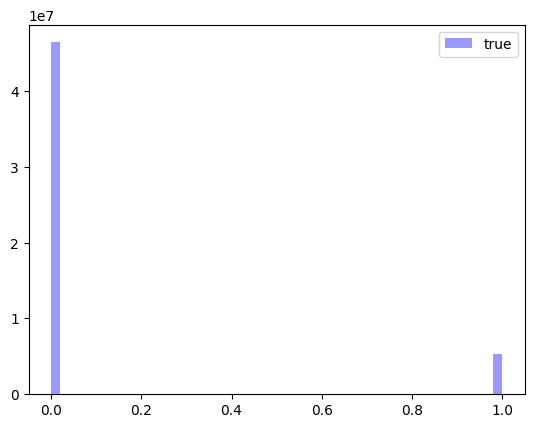

In [24]:
plt.hist(new_all_df['true'].values, alpha = 0.4, color = 'b', label = 'true', bins = 50)
plt.legend()
plt.show()

In [ ]:
models = []
oof_predictions = np.zeros(len(new_all_df))
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
boosting_type = 'gbdt'

for fold, (trn_ind, val_ind) in tqdm(enumerate(kfold.split(new_all_df, new_all_df["true"]))):
    x_train, x_val = new_all_df.drop('true', axis=1).iloc[trn_ind], new_all_df.drop('true', axis=1).iloc[val_ind]
    y_train, y_val = new_all_df["true"].iloc[trn_ind], new_all_df["true"].iloc[val_ind]
    
    train_weight = compute_sample_weight(class_weight='balanced', y=y_train)
    lgb_train = lgb.Dataset(x_train, y_train, weight=train_weight)
    lgb_eval = lgb.Dataset(x_val, y_val, reference=lgb_train)
    
    lgbm_params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'objective': 'binary',
        'boosting': boosting_type,
        'seed': 42,
        'num_leaves': 100,
        'learning_rate': 0.01,
        'feature_fraction': 0.20,
        'bagging_freq': 10,
        'bagging_fraction': 0.50,
        'n_jobs': -1,
        'lambda_l2': 2,
        'min_data_in_leaf': 40,
        'early_stopping_round': 10,
        'num_iterations': 100000,
        'verbose_eval': 500,
    }
    
    model = lgb.train(lgbm_params, lgb_train,
                        valid_sets=lgb_eval,
                     )
    
    models.append(model)
    
    joblib.dump(model,'../output/' + f'lightgbm_fold{fold}.pkl')

    val_pred = model.predict(x_val)
    threshold = find_threshold_percentile(y_val, val_pred)
    pred = val_pred > np.quantile(val_pred, threshold)

    oof_predictions[val_ind] = pred

    fbeta_score(y_val, pred, beta=0.5) 
    del x_train, x_val, y_train, y_val
    gc.collect()

score = fbeta_score(new_all_df["true"], oof_predictions)
print(f'Our out of folds CV score is {score}')

0it [00:00, ?it/s]

[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Info] Number of positive: 4271492, number of negative: 37157092
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.139684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 41428584, number of used features: 8
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[1]	valid_0's binary_logloss: 0.687244
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.681412
[3]	valid_0's binary_logloss: 0.675549
[4]	valid_0's binary_logloss: 0.669985
[5]	valid_0's binary_logloss: 0.664464
[6]	valid_0's bin

In [30]:
oof_predictions

array([0., 0., 0., ..., 0., 0., 0.])

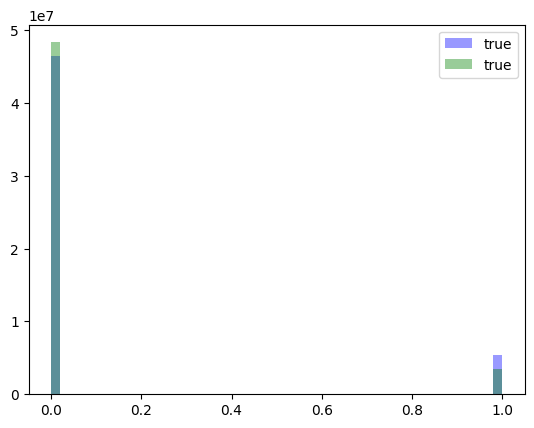

In [31]:
plt.hist(new_all_df['true'].values, alpha = 0.4, color = 'b', label = 'true', bins = 50)
plt.hist(oof_predictions, alpha = 0.4, color = 'g', label = 'true', bins = 50)
plt.legend()
plt.show()

In [32]:
score = fbeta_score(new_all_df["true"], oof_predictions)
print(f'Our out of folds CV score is {score}')

Our out of folds CV score is 0.7906068788917527


In [ ]:
# models = []
# oof_predictions = np.zeros(len(new_all_df))
# kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# for fold, (trn_ind, val_ind) in tqdm(enumerate(kfold.split(new_all_df, new_all_df["true"]))):
#     x_train, x_val = new_all_df.drop('true', axis=1).iloc[trn_ind], new_all_df.drop('true', axis=1).iloc[val_ind]
#     y_train, y_val = new_all_df["true"].iloc[trn_ind], new_all_df["true"].iloc[val_ind]
    
    
#     train_weight = compute_sample_weight(class_weight='balanced', y=y_train).astype('float32')
#     lgb_train = lgb.Dataset(x_train, y_train, weight=train_weight)
#     lgb_eval = lgb.Dataset(x_val, y_val, reference=lgb_train)
    
#     lgbm_params = {
#         'objective': 'binary',
#         'metric': 'binary_logloss',
#         'verbose': 0,
#     }
    
#     model = lgb.train(lgbm_params, lgb_train,
#                         valid_sets=lgb_eval,
#                         num_boost_round=1000,
#                         early_stopping_rounds=10)
    
#     models.append(model)
    
#     joblib.dump(model,'/kaggle/working/' + f'lgbm_fold{fold}.pkl')

#     val_pred = model.predict(x_val)

#     oof_predictions[val_ind] = val_pred

#     fbeta_score(y_val, val_pred, beta=0.5) 
#     del x_train, x_val, y_train, y_val
#     gc.collect()

# score = fbeta_score(new_all_df["true"], oof_predictions)
# accuracy = accuracy_score(new_all_df["true"], oof_predictions)
# print(f'Our out of folds CV score is {score}')
# print(f'Our out of folds Accuracy score is {accuracy}')